## Methodology to classify posts as positive for a campaign.

In this notebook the data base from Moro, Rita and Vala (2016) available at the UCI Machine Learning Repository is going ot be used to classify a facebook post as positive for a campaign by using two different methodologies applied to three columns, which are:

1. comment,	


2. like,	


3. share,

and perhaps two other columns that are related with the kind of post, such as:

4. Type,

5. Category.

It is important to explore the database in order to do any of the methods proposed.


## Exploring the data base

The most important things that it is necessary to ensure in a process of data analysis are:

1. There are not outliers

2. Data is normaly distributed

3. Between features variation is similar

4. Categories are evenly distributed

In the following cells such characteristics are addressed.


In [1]:
#Let's import the dependencies
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt



In [2]:
#Call the database

wd = "C:/Users/avalo/OneDrive/Documentos/tec_documentos_plataforma/facebook_work/dataset_Facebook.csv"

df = pd.read_csv(wd)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
#Let's see how many columns (features) we have and how many rows (observations)
df.shape

(500, 19)

In [4]:
#In order to have easier columns names we change them
df = df.rename(columns={"Lifetime Post Total Reach": "LPost-Tot Reach",
                                            "Lifetime Post Total Impressions": "LPost-Tot Impressions",
                                            "Lifetime Post Consumers": "LPost-Consumers",
                                            "Lifetime Post Consumptions": "LPost-Consumptions",
                                            "Lifetime Post Impressions by people who have liked your Page": "LPost-Liked Page Impressions",
                                            "Lifetime Post reach by people who like your Page": "LPost-Liked Page Reach",
                                            "Lifetime People who have liked your Page and engaged with your post": "LPeople-Post Like & Engange"
                                           })
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,LPost-Consumers,LPost-Consumptions,LPost-Liked Page Impressions,LPost-Liked Page Reach,LPeople-Post Like & Engange,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [5]:
#Let's see a statisitical description of the df
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,LPost-Consumers,LPost-Consumptions,LPost-Liked Page Impressions,LPost-Liked Page Reach,LPeople-Post Like & Engange,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


It is observed that there is a very big variation (chack max and min values together with the standar deviation) in each feature. This is issue mus be adress through a standarization.

Another useful tool to explore data is a scatterplot matrix with an histogram in the diagonal, as shown below.

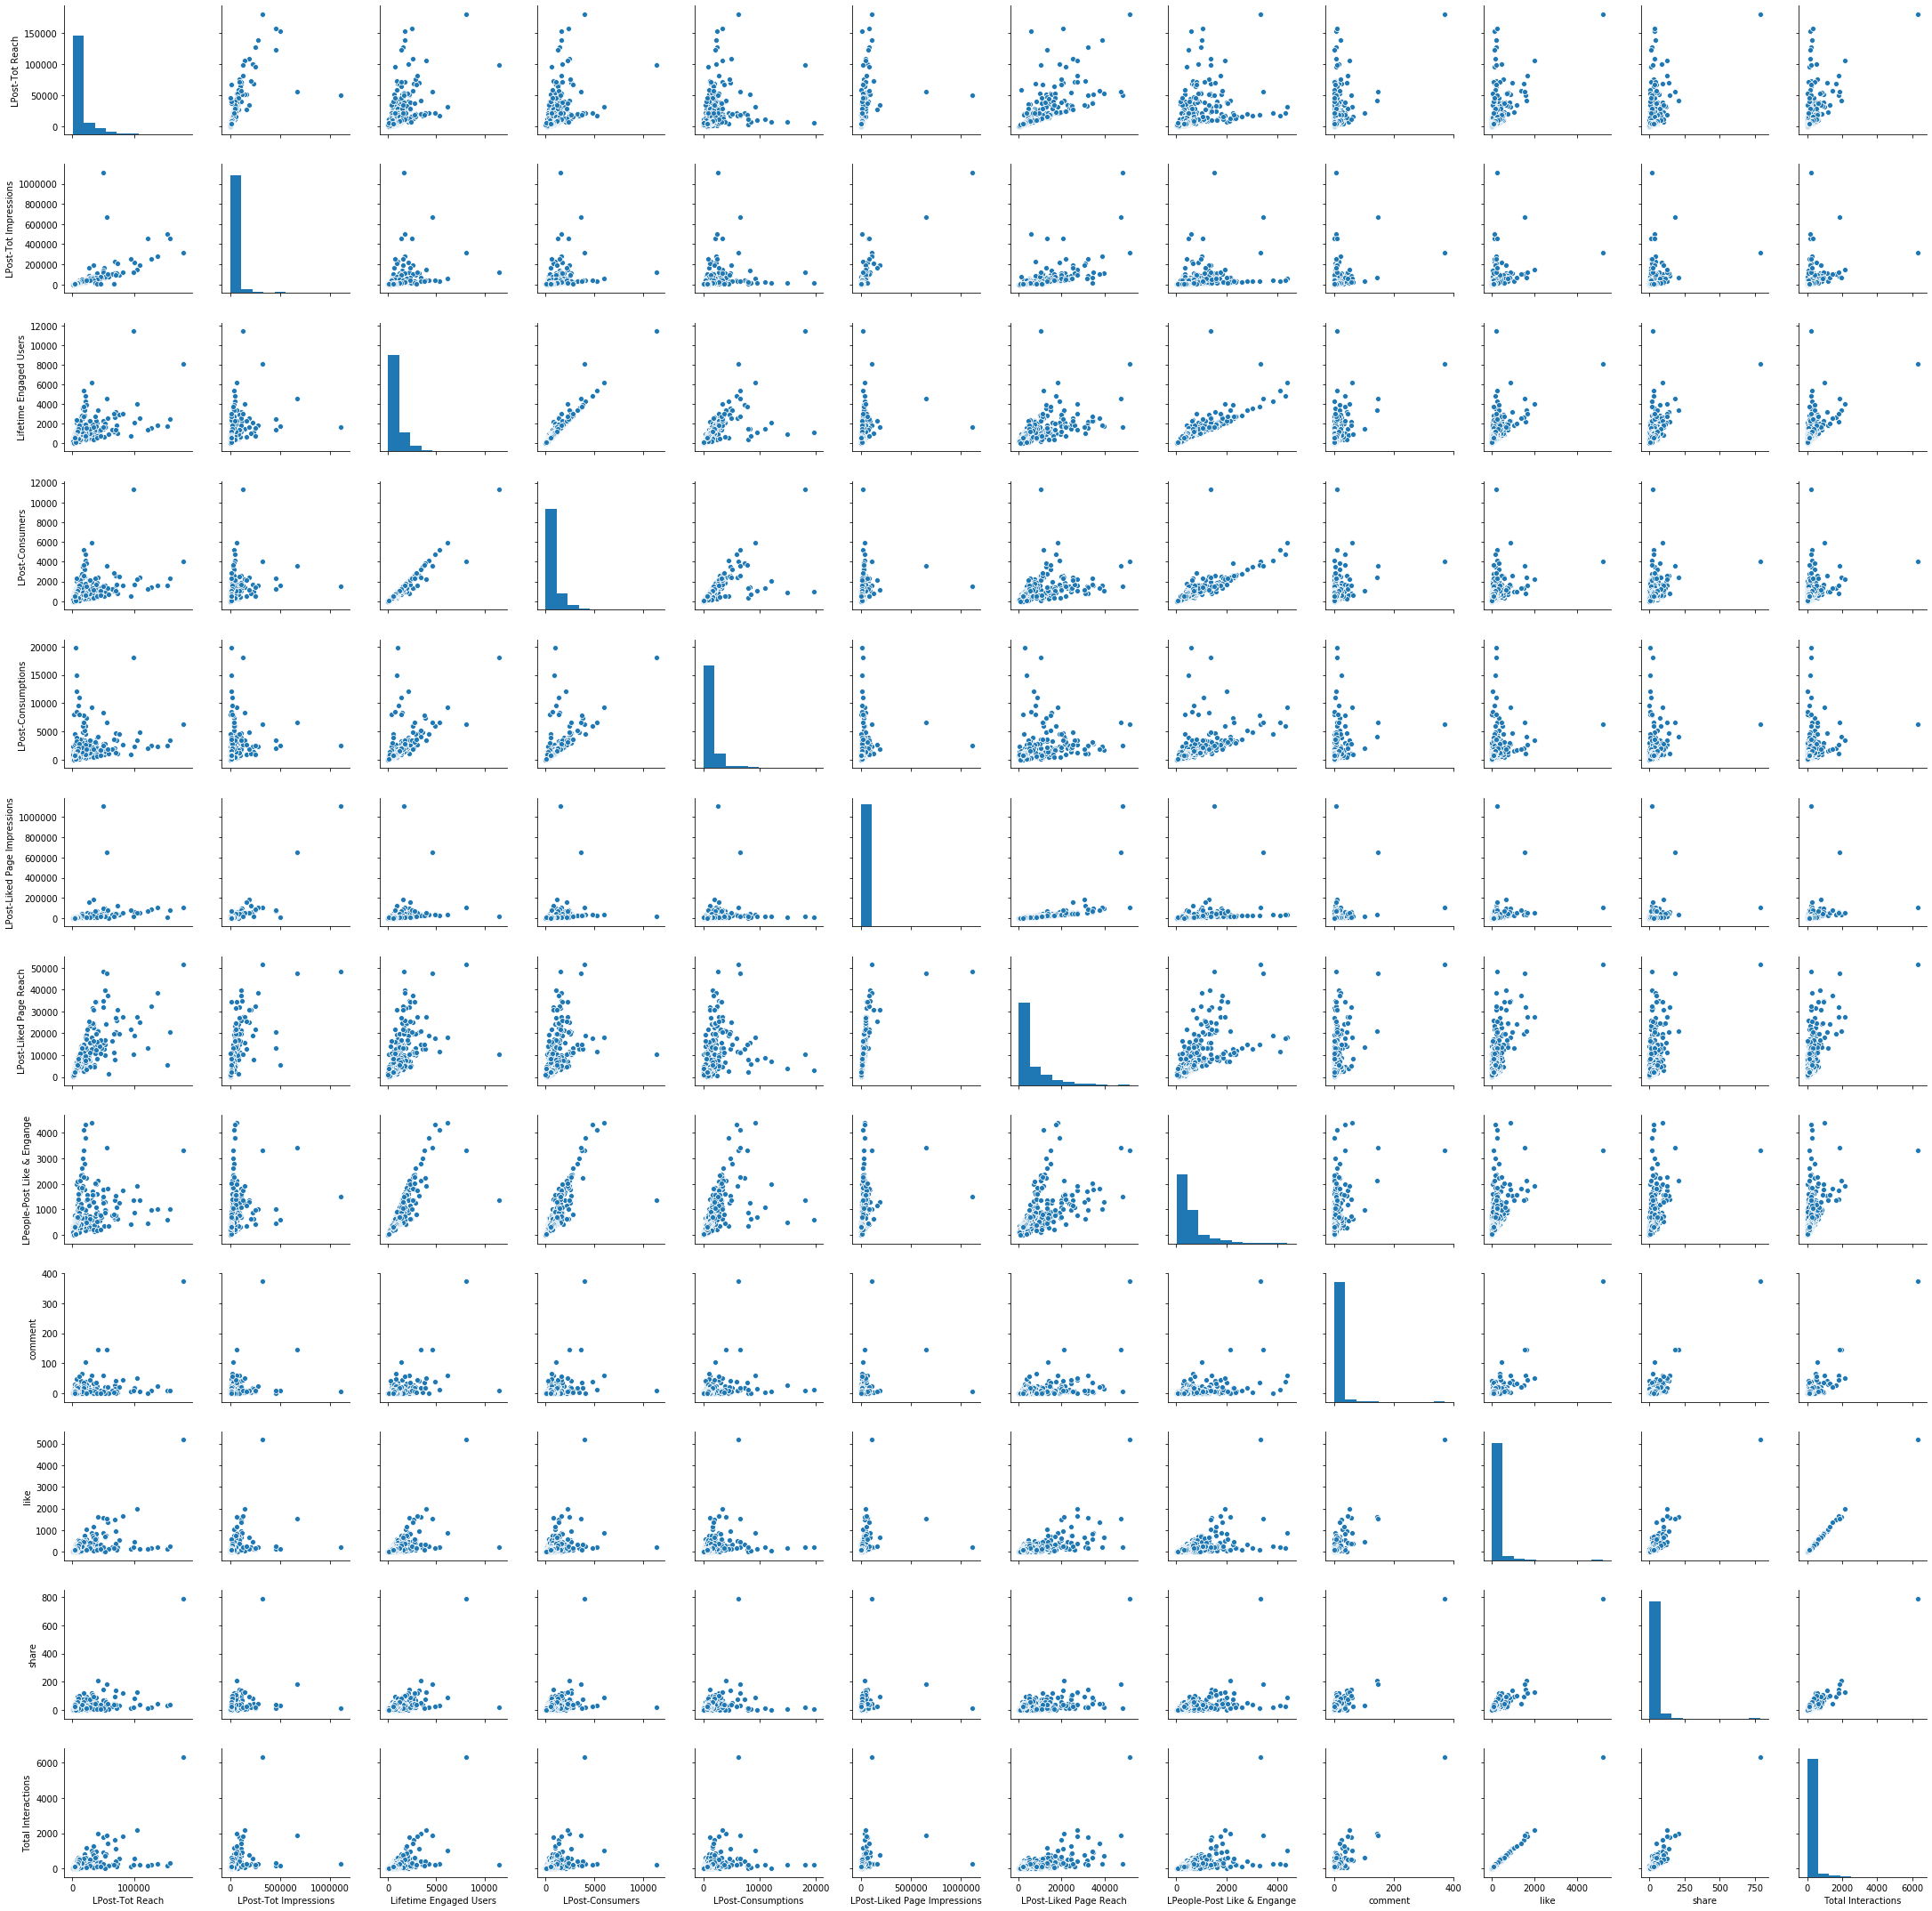

In [6]:
names = ["LPost-Tot Reach", "LPost-Tot Impressions", "Lifetime Engaged Users", "LPost-Consumers", "LPost-Consumptions", 
         "LPost-Liked Page Impressions", "LPost-Liked Page Reach", "LPeople-Post Like & Engange", 
         "comment", "like", "share", "Total Interactions"]

import seaborn as sns

sns.pairplot(df[names], kind='scatter', diag_kind='hist')#, corner=True)

It is observed that most of the features are distributed around a certain values (high columns in each histogram). However, there are some values that are less frequent. In the scatterplots is is observed that there are some points very far from the distribution of most of the data. In order to know if this observations can bee seen as outliers a boxplot graph for each variable can be done. It is importat to know that this is only a visual tool and not necessarily a statistical test.

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


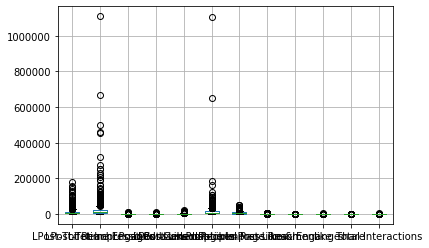

In [7]:
df.boxplot(column=names)

In [8]:
#pip install outlier_utils 

Note: you may need to restart the kernel to use updated packages.


In [9]:
#gRUBS TEST

from outliers import smirnov_grubbs as grubbs

p_values =[]

for name in names:
    #print(df[name].values)
    a = grubbs.max_test_outliers(df[name].values, alpha=.05)
    p_values.append(a)
    

print(f"In the following list the possition of possible outliers is presented {a}")



In the following list the possition of possible outliers is presented [6334, 2177, 1974, 1873, 1806, 1777, 1626, 1439, 1290, 1174, 1136, 1009, 948, 931, 881, 823, 818, 787, 771, 730, 713, 691, 633, 624, 622, 605, 599, 596, 587, 587, 572]


In [10]:
#To understand better lest present it as a df
outliers = pd.DataFrame(list(zip(names, a)), 
               columns =['Variable', 'position']) 
outliers

,Variable,position
0,LPost-Tot Reach,6334
1,LPost-Tot Impressions,2177
2,Lifetime Engaged Users,1974
3,LPost-Consumers,1873
4,LPost-Consumptions,1806
5,LPost-Liked Page Impressions,1777
6,LPost-Liked Page Reach,1626
7,LPeople-Post Like & Engange,1439
8,comment,1290
9,like,1174


Finaly, let's find out how doe categories are distributed. The categories of interest is:

1. Type

2. Category	

3. Post Month	

4. Post Weekday	

5. Post Hour

6. Paid

In [11]:
count_type = df['Type'].value_counts()
count_type


Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [12]:
count_category = df['Category'].value_counts()
count_category


1    215
3    155
2    130
Name: Category, dtype: int64

In [13]:
count_paid = df['Paid'].value_counts()
count_paid


0.0    360
1.0    139
Name: Paid, dtype: int64

In [14]:
count_month = df['Post Month'].value_counts()
count_month


10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64

In [15]:
count_day = df['Post Weekday'].value_counts()
count_day


7    82
6    81
4    72
1    68
5    67
2    66
3    64
Name: Post Weekday, dtype: int64

In [16]:
count_hour = df['Post Hour'].value_counts()
count_hour


3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
5      13
14     13
7      13
8      12
15      6
1       4
17      3
18      3
22      1
16      1
19      1
20      1
23      1
Name: Post Hour, dtype: int64

It is observed that most of the publications are unpaid photos. The most common hour to make a pos is 3 am, and the day and the month are almos equaly distributed.

## Cleaning the data

To clean data it is necessary to remove NA's from the data. Then, we have to remove outliers. This is done in the next cells

In [34]:
#Remove na's
df =df.dropna()
df.shape

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,LPost-Consumers,LPost-Consumptions,LPost-Liked Page Impressions,LPost-Liked Page Reach,LPeople-Post Like & Engange,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,Photo,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


It has been removed 5 rows with NA's.

To remove outliers the scikit learn module has three possible methodologies which are:

1. Isolation Forest in the IsolationForest class.

2.  Minimum Covariance Determinant and Extensions in the EllipticEnvelope class.

3.  LOF: Identifying Density-based Local Outliers in the LocalOutlierFactor class.

We choose the LOF.

In [22]:
# Lets transform a column into a number
type_dummy = pd.get_dummies(df.Type, prefix='Type')
type_dummy

,Type_Link,Type_Photo,Type_Status,Type_Video
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
494,0,1,0,0
495,0,1,0,0
496,0,1,0,0
497,0,1,0,0


In [68]:
#New names
new_names = ["Page total likes", "Category", "Post Month", "Post Weekday", "Post Hour", "Paid",
                            "LPost-Tot Reach", "LPost-Tot Impressions", "Lifetime Engaged Users", "LPost-Consumers",
                            "LPost-Consumptions", "LPost-Liked Page Impressions", "LPost-Liked Page Reach", "LPeople-Post Like & Engange",
                            "comment", "like", "share", "Total Interactions"]
aux = df[new_names]
aux.shape

#Join into a single  df
#df_dummy = pd.merge(aux, type_dummy, left_index=True, right_index=True)
#df_dummy.shape


(486, 22)

In [38]:
# Let's select the columns of interest and convert to an array
X = df_dummy.values
X.shape

(495, 22)

In [39]:
# identify outliers in the training dataset
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.01)

#Let's remove the outliers
X_nout = ee.fit_predict(X)

# select all rows that are not outliers
mask = X_nout != -1
X_new = X[mask, :]
X_new.shape

C:\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


(490, 22)

In [41]:
#New names
new_names = ["Page total likes", "Category", "Post Month", "Post Weekday", "Post Hour", "Paid",
                            "LPost-Tot Reach", "LPost-Tot Impressions", "Lifetime Engaged Users", "LPost-Consumers",
                            "LPost-Consumptions", "LPost-Liked Page Impressions", "LPost-Liked Page Reach", "LPeople-Post Like & Engange",
                            "comment", "like", "share", "Total Interactions", "Type_Link", "Type_Photo", "Type_Status",
             "Type_Video" ]

df = pd.DataFrame(X_new, columns=new_names)
df

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,LPost-Consumers,...,LPost-Liked Page Reach,LPeople-Post Like & Engange,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441.0,2.0,12.0,4.0,3.0,0.0,2752.0,5091.0,178.0,109.0,...,1640.0,119.0,4.0,79.0,17.0,100.0,0.0,1.0,0.0,0.0
1,139441.0,2.0,12.0,3.0,10.0,0.0,10460.0,19057.0,1457.0,1361.0,...,6112.0,1108.0,5.0,130.0,29.0,164.0,0.0,0.0,1.0,0.0
2,139441.0,3.0,12.0,3.0,3.0,0.0,2413.0,4373.0,177.0,113.0,...,1503.0,132.0,0.0,66.0,14.0,80.0,0.0,1.0,0.0,0.0
3,139441.0,2.0,12.0,2.0,10.0,1.0,50128.0,87991.0,2211.0,790.0,...,32048.0,1386.0,58.0,1572.0,147.0,1777.0,0.0,1.0,0.0,0.0
4,139441.0,2.0,12.0,2.0,3.0,0.0,7244.0,13594.0,671.0,410.0,...,3200.0,396.0,19.0,325.0,49.0,393.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,85093.0,3.0,1.0,7.0,10.0,0.0,5400.0,9218.0,810.0,756.0,...,3230.0,422.0,10.0,125.0,41.0,176.0,0.0,1.0,0.0,0.0
486,85093.0,3.0,1.0,7.0,2.0,0.0,4684.0,7536.0,733.0,708.0,...,2876.0,392.0,5.0,53.0,26.0,84.0,0.0,1.0,0.0,0.0
487,81370.0,2.0,1.0,5.0,8.0,0.0,3480.0,6229.0,537.0,508.0,...,2104.0,301.0,0.0,53.0,22.0,75.0,0.0,1.0,0.0,0.0
488,81370.0,1.0,1.0,5.0,2.0,0.0,3778.0,7216.0,625.0,572.0,...,2388.0,363.0,4.0,93.0,18.0,115.0,0.0,1.0,0.0,0.0


### Principal component analysis

Principal component analysis is a methodology whose aim is to reduce dimensions or the number of features  by building a linear combination of the features. Such linear combination can be written as:

$$ y_{i}= a_{1}x_{1} + a_{2}x_{2}+...+a_{n}x_{n}$$

where $a_{i}'s$ are known as weights and are an indicator of the importance of each variable, and $n$ is the number of features.

In [46]:
#Scale the data
X = df.values

from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[ 0.997643  ,  0.13190359,  1.4995792 , ...,  0.4217637 ,
        -0.31799936, -0.12038585],
       [ 0.997643  ,  0.13190359,  1.4995792 , ..., -2.37099591,
         3.14466038, -0.12038585],
       [ 0.997643  ,  1.30704464,  1.4995792 , ...,  0.4217637 ,
        -0.31799936, -0.12038585],
       ...,
       [-2.62467407,  0.13190359, -1.85008175, ...,  0.4217637 ,
        -0.31799936, -0.12038585],
       [-2.62467407, -1.04323746, -1.85008175, ...,  0.4217637 ,
        -0.31799936, -0.12038585],
       [-2.62467407,  1.30704464, -1.85008175, ...,  0.4217637 ,
        -0.31799936, -0.12038585]])

In [50]:
# Applying PCA function on training 
pca = PCA(n_components=2) #creamos el objeto

principalComponents = pca.fit_transform(X_scaled) # obteniendo las componentes principales

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2']) # Crear un df con las PC

In [48]:
principalDataframe

,PC1,PC2
0,-1.841899,0.530527
1,0.861226,-3.364526
2,-1.963736,0.612341
3,7.702325,3.577795
4,-0.273224,1.040805
...,...,...
485,-0.748230,0.937169
486,-1.159474,0.690052
487,-1.487892,0.736120
488,-1.246802,0.588783


In [51]:
components = pca.components_
components

array([[ 0.00451136, -0.01640561, -0.00677304, -0.02397555, -0.00205412,
         0.06294193,  0.30309105,  0.28772665,  0.31349569,  0.26460177,
         0.19448359,  0.27703575,  0.31640975,  0.28470223,  0.26676813,
         0.3041174 ,  0.28116693,  0.30490497, -0.02437015, -0.08355792,
         0.09393974,  0.06603991],
       [-0.0788631 ,  0.12173777, -0.10253994, -0.07503287,  0.00854248,
         0.0307329 ,  0.07093685,  0.06956102, -0.18513831, -0.28975838,
        -0.23111596,  0.02135872,  0.00539478, -0.28354545,  0.23459238,
         0.26330453,  0.2530827 ,  0.26526826, -0.09181407,  0.45713124,
        -0.46365653, -0.09075651]])

In [52]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.33010393, 0.12000292])

### Therefore, the princial component that we are going to use to explain the the success of a facebook publication is going to be the first principal component, specifically it is going to be the score, i.e.

$$ success = 0.54*comment + 0.60*like + 0.59*share $$


In [ ]:
#Let's generate a new column in the df
success = principalDataframe[["PC1"]]

In [ ]:
success

In [ ]:
new_df = pd.DataFrame(X_new, columns=['comment','like', 'share'])
new_df

In [ ]:
new_df["success"] = success
new_df.head()

In [ ]:
new_df[["comment","like", "share", "success"]].describe()

In [ ]:
#Scatterplot matrix
import seaborn as sns

sns.pairplot(new_df[["comment","like", "share", "success"]])

In [ ]:
new_df.boxplot("success")

In [ ]:
### kMEDIAS


In [53]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
#from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [54]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_scaled)
labels = k_means.labels_
print(labels)

[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [56]:
df["Clus_km"] = labels
df.head(5)

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,LPost-Consumers,...,LPeople-Post Like & Engange,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video,Clus_km
0,139441.0,2.0,12.0,4.0,3.0,0.0,2752.0,5091.0,178.0,109.0,...,119.0,4.0,79.0,17.0,100.0,0.0,1.0,0.0,0.0,0
1,139441.0,2.0,12.0,3.0,10.0,0.0,10460.0,19057.0,1457.0,1361.0,...,1108.0,5.0,130.0,29.0,164.0,0.0,0.0,1.0,0.0,0
2,139441.0,3.0,12.0,3.0,3.0,0.0,2413.0,4373.0,177.0,113.0,...,132.0,0.0,66.0,14.0,80.0,0.0,1.0,0.0,0.0,0
3,139441.0,2.0,12.0,2.0,10.0,1.0,50128.0,87991.0,2211.0,790.0,...,1386.0,58.0,1572.0,147.0,1777.0,0.0,1.0,0.0,0.0,1
4,139441.0,2.0,12.0,2.0,3.0,0.0,7244.0,13594.0,671.0,410.0,...,396.0,19.0,325.0,49.0,393.0,0.0,1.0,0.0,0.0,0


In [57]:
df.groupby('Clus_km').mean()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,LPost-Consumers,...,LPost-Liked Page Reach,LPeople-Post Like & Engange,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,122825.050239,1.923445,6.976077,4.107656,7.765550,0.263158,7552.904306,12996.811005,633.882775,558.332536,...,4146.849282,419.064593,4.648325,115.126794,20.739234,140.514354,0.047847,0.894737,0.052632,0.004785
1,127060.041667,1.680556,7.652778,4.236111,8.222222,0.388889,45096.611111,85581.013889,2528.513889,2144.277778,...,19704.777778,1691.430556,22.611111,531.152778,63.166667,616.930556,0.027778,0.583333,0.319444,0.069444


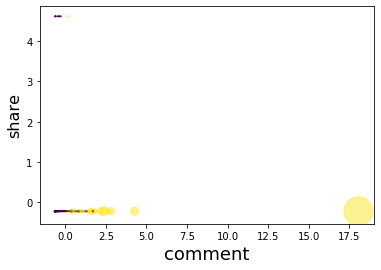

In [59]:
area = np.pi * ( X_scaled[:, 17])**2  
plt.scatter(X_scaled[:, 16], X_scaled[:, 18], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('comment', fontsize=18)
plt.ylabel('share', fontsize=16)
plt.show()

## Dbscan

Dbsan is another non supervised ML technique to classify data.

DBSCAN es un acrónimo que proviene del inglés "Density-Based Spatial Clustering of Applications with Noise". Ésta técnica es uno de los algoritmos más comunes que trabaja basándose en la densidad del objeto. LLa idea es que si un punto particular pertenece a un grupo, debería estar cerca de muchos otros puntos en ese grupo.

Funciona en base a dos parámetros: Epsilon y Minimum Points.

Epsilon: determina un radio específico que si incluye suficiente número de puntos dentro, lo llamamos área densa.
minimumSamples: Determina el número mínimo de puntos que se quiere en una vecindad para definir un clúster.

In [ ]:
from sklearn.cluster import DBSCAN 
epsilon = 0.3
minimumSamples = 490/2
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_scaled)
labels = db.labels_
labels

In [ ]:
# Primero se crea una arreglo de booleanos usando las etiquetas de db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #Devuelve una matriz de forma y tipo dados como matriz de ceros,
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

In [ ]:
# Número de clústers en etiquetas, ignorando el ruido.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

In [ ]:
# Se quita la repetición en las etiquetas convirtiendolo en un conjunto.
unique_labels = set(labels)
unique_labels

## Hierarchihcal clustering


In [60]:
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

# Creamos el objeto de agrupamiento aglomerativo y lo guardamos en agglom
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'average')

In [61]:
agglom.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

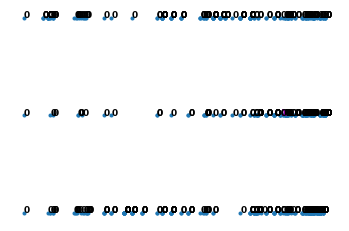

In [62]:
#Extraemos el máximo y el mínimo de X1.
x_min, x_max = np.min(X_scaled, axis=0), np.max(X_scaled, axis=0)

# Obtenemos la distancia promedio para X1 (los escalamos).
X1 = (X_scaled - x_min) / (x_max - x_min)

# En este bucle se muestran todos los puntos.
for i in range(X1.shape[0]):
    # Se reemplazan los puntos con su respectivo valor de clúster 
    # (ex. 0) y se colorea (color coded) con un mapa de color (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(agglom.labels_[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
#  se quitan las marcas en la x y y (ticks) así como los ejes
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Gráfica los datos originales antes de agruparlos
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()


In [63]:
#Lets add the labels 
labels_2 = agglom.labels_
labels_2



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
df["Hier_clus"] = labels_2

In [65]:
df

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,LPost-Consumers,...,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video,Clus_km,Hier_clus
0,139441.0,2.0,12.0,4.0,3.0,0.0,2752.0,5091.0,178.0,109.0,...,4.0,79.0,17.0,100.0,0.0,1.0,0.0,0.0,0,0
1,139441.0,2.0,12.0,3.0,10.0,0.0,10460.0,19057.0,1457.0,1361.0,...,5.0,130.0,29.0,164.0,0.0,0.0,1.0,0.0,0,0
2,139441.0,3.0,12.0,3.0,3.0,0.0,2413.0,4373.0,177.0,113.0,...,0.0,66.0,14.0,80.0,0.0,1.0,0.0,0.0,0,0
3,139441.0,2.0,12.0,2.0,10.0,1.0,50128.0,87991.0,2211.0,790.0,...,58.0,1572.0,147.0,1777.0,0.0,1.0,0.0,0.0,1,0
4,139441.0,2.0,12.0,2.0,3.0,0.0,7244.0,13594.0,671.0,410.0,...,19.0,325.0,49.0,393.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,85093.0,3.0,1.0,7.0,10.0,0.0,5400.0,9218.0,810.0,756.0,...,10.0,125.0,41.0,176.0,0.0,1.0,0.0,0.0,0,0
486,85093.0,3.0,1.0,7.0,2.0,0.0,4684.0,7536.0,733.0,708.0,...,5.0,53.0,26.0,84.0,0.0,1.0,0.0,0.0,0,0
487,81370.0,2.0,1.0,5.0,8.0,0.0,3480.0,6229.0,537.0,508.0,...,0.0,53.0,22.0,75.0,0.0,1.0,0.0,0.0,0,0
488,81370.0,1.0,1.0,5.0,2.0,0.0,3778.0,7216.0,625.0,572.0,...,4.0,93.0,18.0,115.0,0.0,1.0,0.0,0.0,0,0


In [66]:
cluster_count = df['Clus_km'].value_counts()
cluster_count

0    418
1     72
Name: Clus_km, dtype: int64

In [67]:
hcluster_count = df['Hier_clus'].value_counts()
hcluster_count

0    489
1      1
Name: Hier_clus, dtype: int64

## Final df



In [ ]:
df_1 = df.iloc[:, 0:15]

In [ ]:
df_1

In [ ]:
df.shape

In [ ]:
df_1 = df.iloc[:, 0:15]
df_1

In [ ]:
df_2 = new_df[["comment", "like", "share","Clus_km"]]
df_2

In [ ]:
prueba = df.merge(df_2, how='inner', left_on=["comment", "like", "share"], right_on=["comment", "like", "share"])
prueba